In [1]:
using Pkg
tb_path = "../../../"
Pkg.activate(tb_path)

  Activating project at `~/Documents/RangelLab/aDDM-Toolbox/ADDM.jl`


In [2]:
using ADDM, CSV, DataFrames, DataFramesMeta
using Distributions, Plots, StatsPlots, Random, Plots.PlotMeasures
using LaTeXStrings, Measures
Random.seed!(38435)

m = ADDM.define_model(d = 0.007, σ = 0.03, barrier = 1, 
                       decay = 0, nonDecisionTime = 100, bias = 0.0);

t = ADDM.DDM_simulate_trial(model = m, valueLeft = 2, valueRight = 1.5)

ADDM.Trial(Dict{Symbol, Any}(:choice => -1, :valueRight => 1.5, :valueLeft => 2, :RDV => Number[0.0, -0.02090115550441254, -0.03826006010624356, -0.05258408231984366, -0.060971542454050606, -0.06214959283212192, -0.02327545644891227, 0.0038290955654657274, -0.00298831047059694, 0.023487413622535834  …  0.8764407527137775, 0.8815112006393363, 0.8824103439984049, 0.9287375913924342, 0.9319607512815308, 0.9095193203554301, 0.9054045247758877, 0.8906298011849235, 0.9812347192234874, 1.0019747645738266], :RT => 1770.0))

In [4]:
m2 = ADDM.define_model(d = 0.007, σ = 0.05, barrier = 1, 
                       decay = 0, nonDecisionTime = 100, bias = 0.0);

ADDM.DDM_get_trial_likelihood(model = m2, trial = t, stateStep = .1) > ADDM.DDM_get_trial_likelihood(model = m, trial = t, stateStep = .1)

true

In [5]:
ADDM.DDM_get_trial_likelihood(model = m2, trial = t, stateStep = .01) > ADDM.DDM_get_trial_likelihood(model = m, trial = t, stateStep = .01)


false

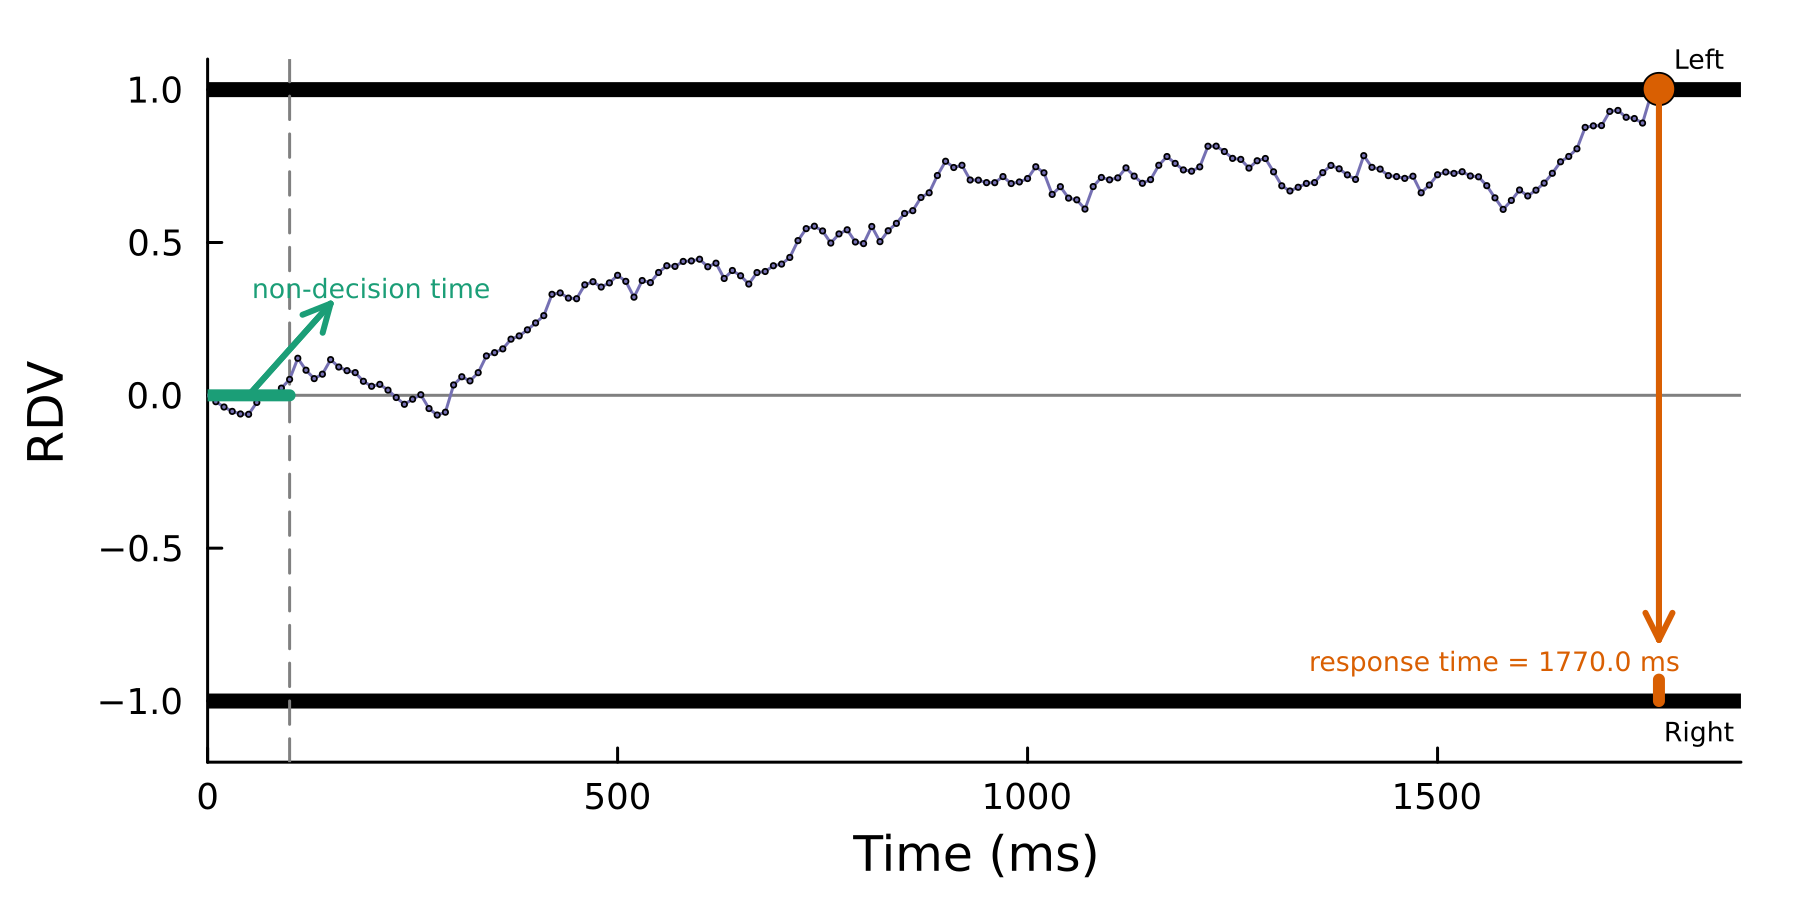

In [39]:
# Draw background
plot(legend = false, grid = false, ylims = [-1.2, 1.1], xlims = [0, t.RT+100], 
    xlabel = "Time (ms)", ylabel = "RDV", 
    dpi = 300, size = (600, 300), margin = 3mm)
hline!([-1, 1], line = (:black, 5))
hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)

# Static plot
timeStep = 10
plot!([0:timeStep:t.RT], [t.RDV], marker = 1, color = RGB(117/255,112/255,179/255))
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# Add annotations for ndt and RT
plot!([0, m.nonDecisionTime], [0, 0], line = (RGB(27/255,158/255,119/255) , 4))
plot!([50,150],[0,.3], arrow = true, color = RGB(27/255,158/255,119/255), linewidth = 2)
annotate!(200, .35, text("non-decision time", color = RGB(27/255,158/255,119/255), 6))

plot!([t.RT, t.RT],[1,-.8], arrow = true, color = RGB(217/255,95/255,2/255), linewidth = 2)
plot!([t.RT, t.RT], [-1, -.93], line = (RGB(217/255,95/255,2/255) , 4))
annotate!(t.RT-200, -.87, text("response time = " * string(t.RT) * " ms", color = RGB(217/255,95/255,2/255), 6))

annotate!(1820, 1.1, text("Left", 6))
annotate!(1820, -1.1, text("Right", 6))


In [40]:
savefig("plot_2_1.png");

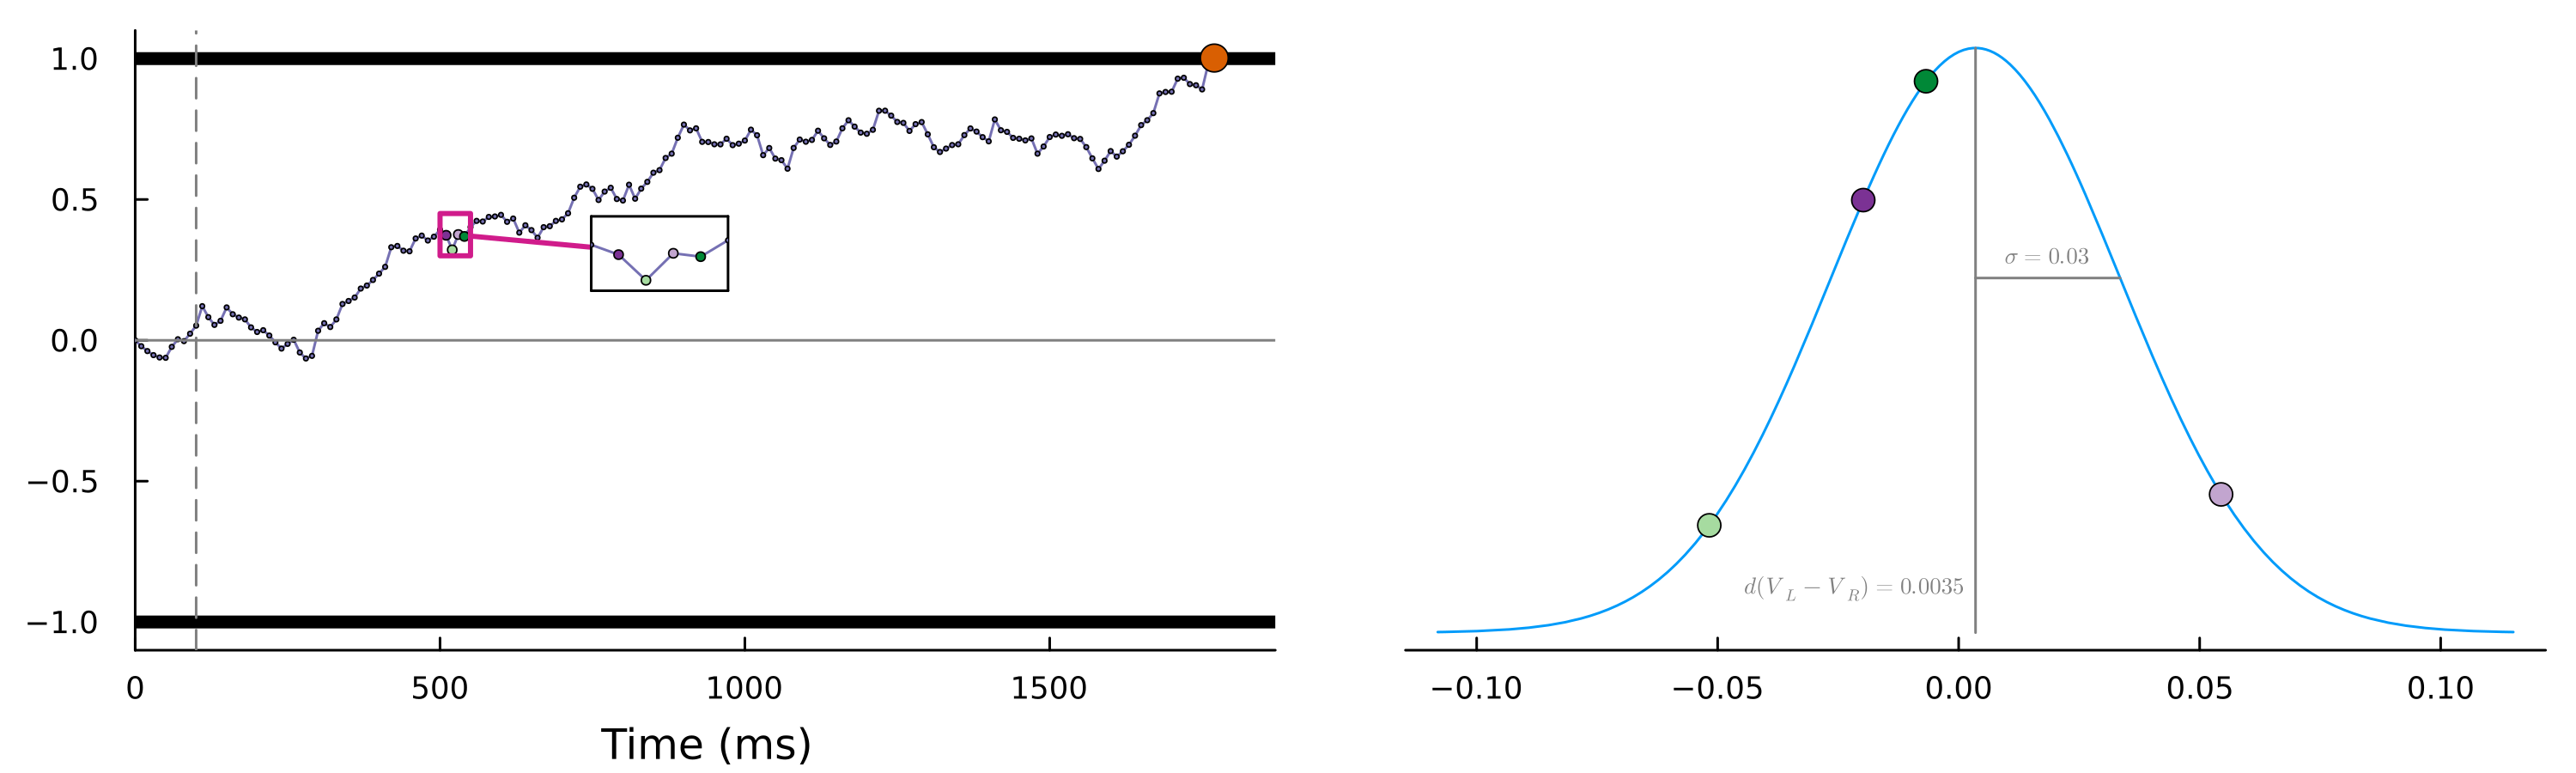

In [23]:
plot(legend = false, grid = false, layout = 2, size=(1000, 300), bottom_margin = 5mm, dpi = 300)


# Accummulation
timeStep = 10
plot!([0:timeStep:t.RT], [t.RDV], marker = 1, color = RGB(117/255,112/255,179/255), 
      ylims = [-1.1, 1.1], xlims = [0, t.RT+100],  xlabel = "Time (ms)", subplot = 1)
hline!([-1, 1], line = (:black, 5))
hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# Highlight example RDV points
plot!([510], [t.RDV[52]], marker = 2, color = RGB(123/255,50/255,148/255))
plot!([520], [t.RDV[53]], marker = 2, color = RGB(166/255,219/255,160/255))
plot!([530], [t.RDV[54]], marker = 2, color = RGB(194/255,165/255,207/255))
plot!([540], [t.RDV[55]], marker = 2, color = RGB(0/255,136/255,55/255))

# Inset zoom
lens!([500, 550], [.3, .45];
       inset=(1, bbox(0.4, 0.3, 0.12, 0.12)), 
       subplot=3, ticks=false, framestyle=:box,
       lw=2, lc=RGB(208/255,28/255,139/255))    


# RDV sampling distribution
mu = m.d*(t.valueLeft - t.valueRight)
sd = m.σ
s1 = L"d(V_L - V_R) = 0.0035";
s2 = L"\sigma = 0.03"

plot!(Normal(mu,sd), legend = false, grid = false, showaxis = :x, subplot=2)

# Add drift rate info
plot!([mu, mu], [0, pdf(Normal(mu, sd), mu)], line = (:gray, 1), subplot = 2)
annotate!(mu-sd+.005, 1, text(s1, color = :gray, 6), subplot = 2)

# Add noise info
plot!([mu, mu+sd], [pdf(Normal(mu, sd), mu+sd), pdf(Normal(mu, sd), mu+sd)], line = (:gray, 1), subplot = 2)
annotate!(mu+sd/2, pdf(Normal(mu, sd), mu+sd)+.5, text(s2, color = :gray, 6), subplot = 2)

plot!([diff(t.RDV)[51]], [pdf(Normal(mu, sd), diff(t.RDV)[51])], marker = 5, color = RGB(123/255,50/255,148/255), subplot = 2)
plot!([diff(t.RDV)[52]], [pdf(Normal(mu, sd), diff(t.RDV)[52])], marker = 5, color = RGB(166/255,219/255,160/255), subplot = 2)
plot!([diff(t.RDV)[53]], [pdf(Normal(mu, sd), diff(t.RDV)[53])], marker = 5, color = RGB(194/255,165/255,207/255), subplot = 2)
plot!([diff(t.RDV)[54]], [pdf(Normal(mu, sd), diff(t.RDV)[54])], marker = 5, color = RGB(0/255,136/255,55/255), subplot = 2)



In [24]:
savefig("plot_2_2.png");

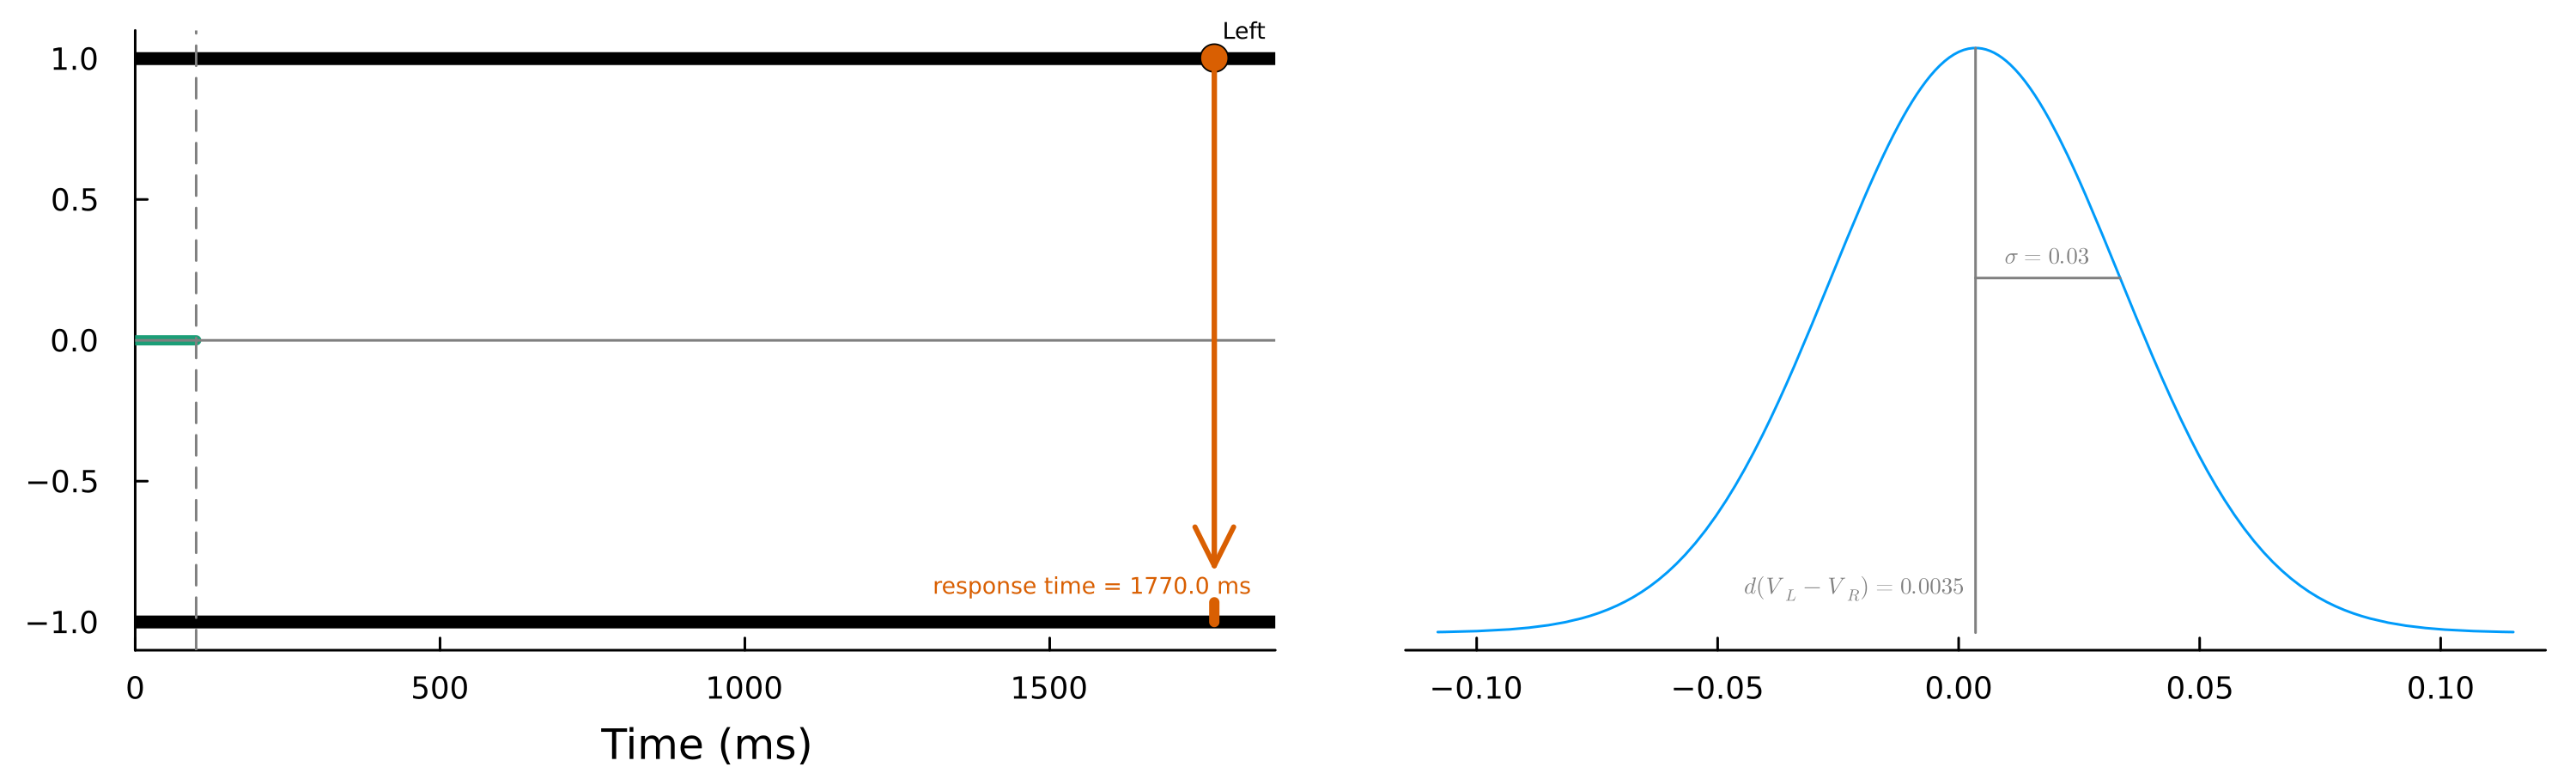

In [57]:
plot(legend = false, grid = false, layout = 2, size=(1000, 300), bottom_margin = 5mm, dpi = 300)


# RDV space with NDT
timeStep = 10
plot!(ylims = [-1.1, 1.1], xlims = [0, t.RT+100],  xlabel = "Time (ms)", subplot = 1)
plot!([0, m.nonDecisionTime], [0, 0], line = (RGB(27/255,158/255,119/255) , 4))
hline!([-1, 1], line = (:black, 5))
hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# RDV sampling distribution
mu = m.d*(t.valueLeft - t.valueRight)
sd = m.σ
s1 = L"d(V_L - V_R) = 0.0035";
s2 = L"\sigma = 0.03"

plot!(Normal(mu,sd), legend = false, grid = false, showaxis = :x, subplot=2)

# Add drift rate info
plot!([mu, mu], [0, pdf(Normal(mu, sd), mu)], line = (:gray, 1), subplot = 2)
annotate!(mu-sd+.005, 1, text(s1, color = :gray, 6), subplot = 2)

# Add noise info
plot!([mu, mu+sd], [pdf(Normal(mu, sd), mu+sd), pdf(Normal(mu, sd), mu+sd)], line = (:gray, 1), subplot = 2)
annotate!(mu+sd/2, pdf(Normal(mu, sd), mu+sd)+.5, text(s2, color = :gray, 6), subplot = 2)

# Add choice and RT info

plot!([t.RT, t.RT],[1,-.8], arrow = true, color = RGB(217/255,95/255,2/255), linewidth = 2)
plot!([t.RT, t.RT], [-1, -.93], line = (RGB(217/255,95/255,2/255) , 4))
annotate!(t.RT-200, -.87, text("response time = " * string(t.RT) * " ms", color = RGB(217/255,95/255,2/255), 6))

annotate!(1820, 1.1, text("Left", 6))


In [58]:
savefig("plot_2_3.png");

In [62]:
stateStep = .2
# Obtain correct state step.
halfNumStateBins = ceil(m.barrier / stateStep)
stateStep = m.barrier / (halfNumStateBins + 0.5)

# The vertical axis is divided into states.
states = range(-1*(m.barrier) + stateStep / 2, 1*(m.barrier) - stateStep/2, step=stateStep)
collect(states)

11-element Vector{Float64}:
 -0.9090909090909091
 -0.7272727272727273
 -0.5454545454545454
 -0.36363636363636365
 -0.18181818181818182
  0.0
  0.18181818181818182
  0.36363636363636365
  0.5454545454545454
  0.7272727272727273
  0.9090909090909091

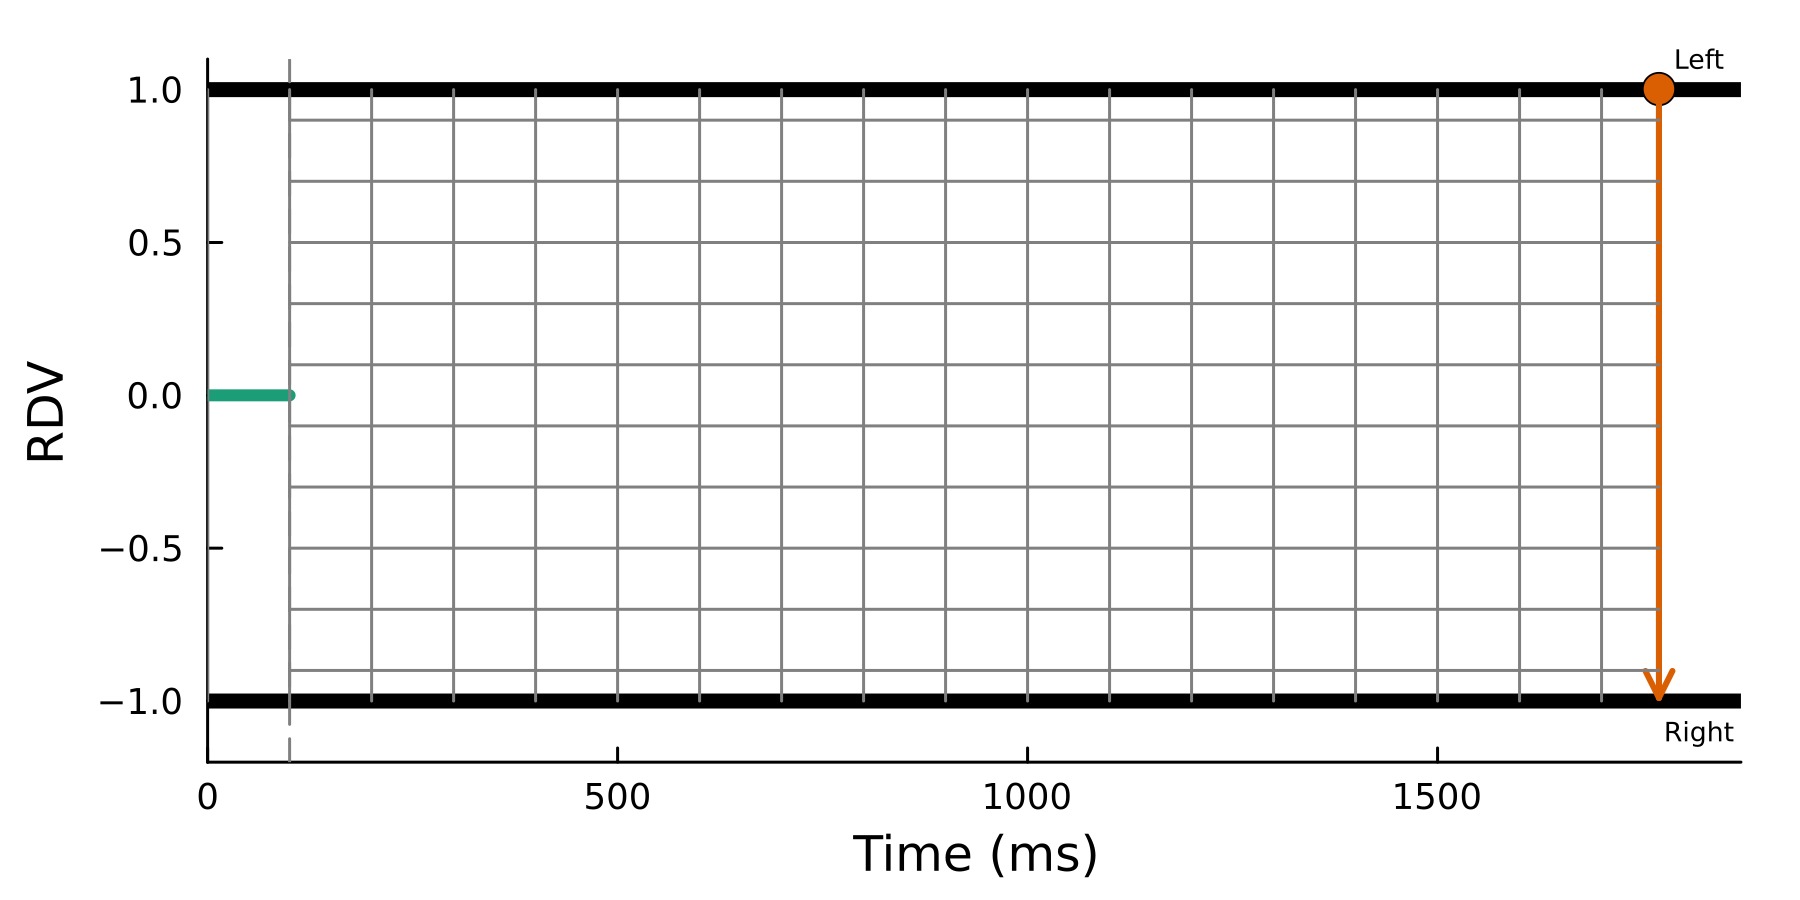

In [106]:
# Draw background
plot(legend = false, grid = false, ylims = [-1.2, 1.1], xlims = [0, t.RT+100], 
    xlabel = "Time (ms)", ylabel = "RDV", 
    dpi = 300, size = (600, 300), margin = 3mm)
hline!([-1, 1], line = (:black, 5))
# hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)

# Static plot
timeStep = 10
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# Add annotations for ndt and RT
plot!([0, m.nonDecisionTime], [0, 0], line = (RGB(27/255,158/255,119/255) , 4))

plot!([t.RT, t.RT],[1,-.99], arrow = true, color = RGB(217/255,95/255,2/255), linewidth = 2)
# plot!([t.RT, t.RT], [-1, -.93], line = (RGB(217/255,95/255,2/255) , 4))
# annotate!(t.RT-80, -.87, text("RT = " * string(t.RT) * " ms", color = RGB(217/255,95/255,2/255), 6))


# for i in 1:length(states)
for i in -.9:.2:.9
  # plot!([m.nonDecisionTime, t.RT], [states[i], states[i]], line = (:gray, 1))
  plot!([m.nonDecisionTime, t.RT], [i, i], line = (:gray, 1))
end

for i in 0:100:t.RT
    plot!([i, i], [-1, 1], line = (:gray, 1))
end

annotate!(1820, 1.1, text("Left", 6))
annotate!(1820, -1.1, text("Right", 6))


In [107]:
savefig("plot_2_4.png");

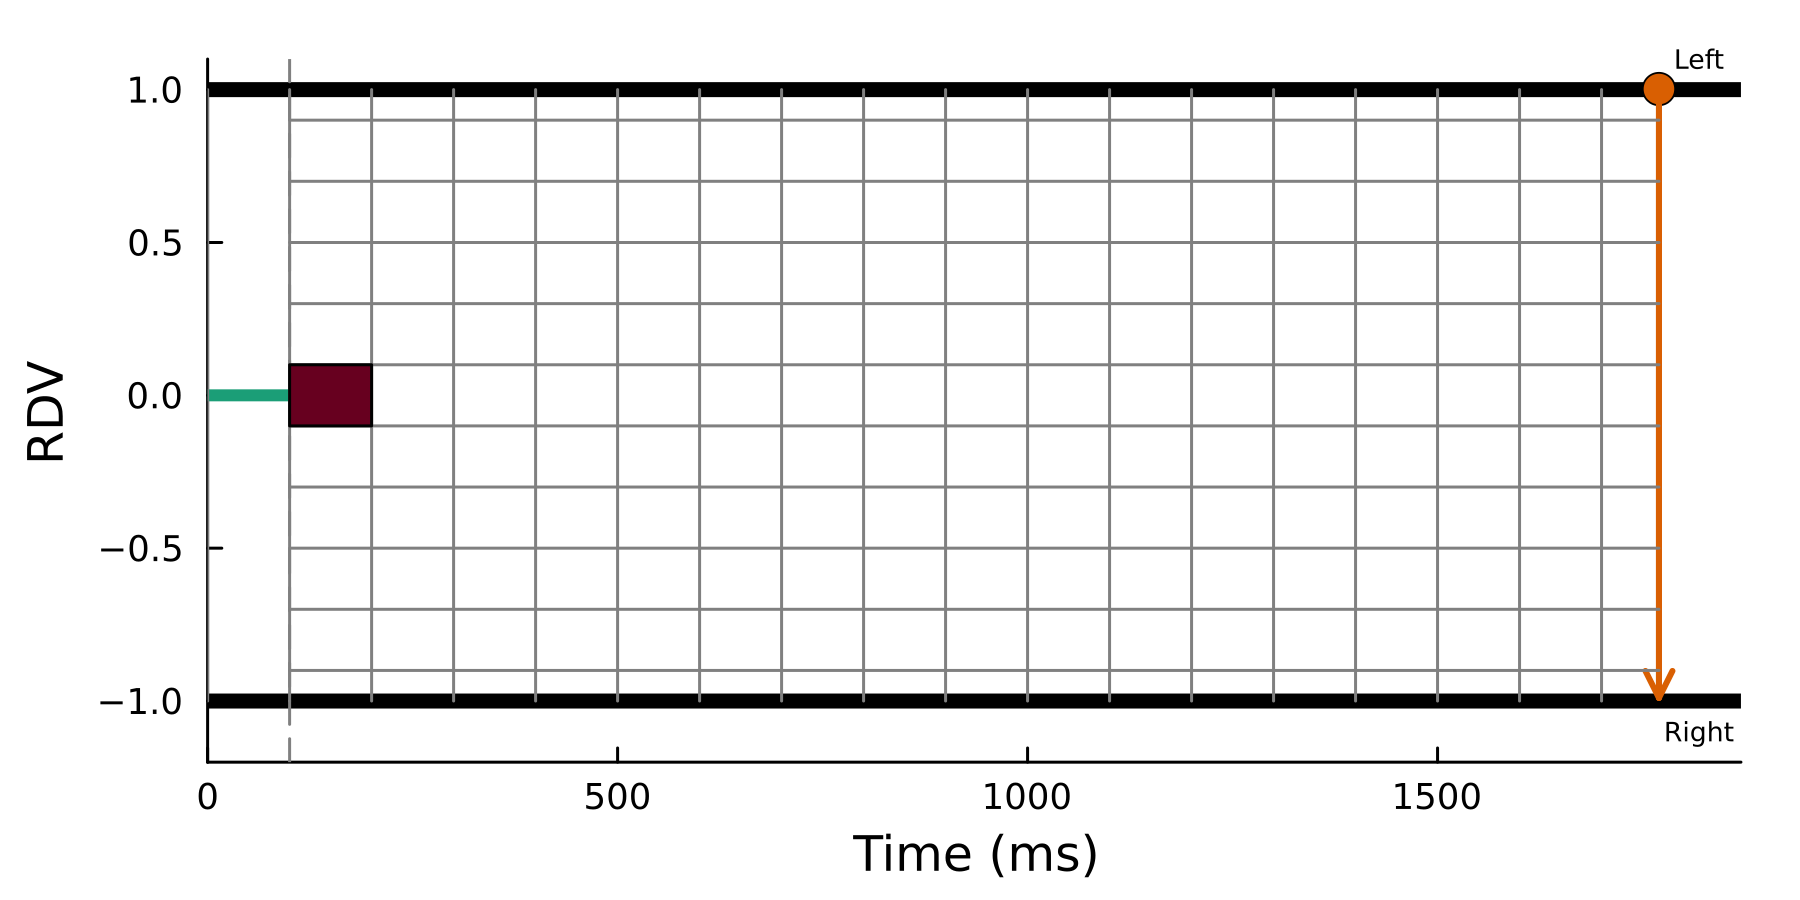

In [114]:
# Draw background
plot(legend = false, grid = false, ylims = [-1.2, 1.1], xlims = [0, t.RT+100], 
    xlabel = "Time (ms)", ylabel = "RDV", 
    dpi = 300, size = (600, 300), margin = 3mm)
hline!([-1, 1], line = (:black, 5))
# hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)

# Static plot
timeStep = 10
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# Add annotations for ndt and RT
plot!([0, m.nonDecisionTime], [0, 0], line = (RGB(27/255,158/255,119/255) , 4))

plot!([t.RT, t.RT],[1,-.99], arrow = true, color = RGB(217/255,95/255,2/255), linewidth = 2)
# plot!([t.RT, t.RT], [-1, -.93], line = (RGB(217/255,95/255,2/255) , 4))
# annotate!(t.RT-80, -.87, text("RT = " * string(t.RT) * " ms", color = RGB(217/255,95/255,2/255), 6))


# for i in 1:length(states)
for i in -.9:.2:.9
  # plot!([m.nonDecisionTime, t.RT], [states[i], states[i]], line = (:gray, 1))
  plot!([m.nonDecisionTime, t.RT], [i, i], line = (:gray, 1))
end

for i in 0:100:t.RT
    plot!([i, i], [-1, 1], line = (:gray, 1))
end

annotate!(1820, 1.1, text("Left", 6))
annotate!(1820, -1.1, text("Right", 6))

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
plot!(rectangle(100,.2,100,-.1), color = RGB(103/255,0/255,31/255))


In [109]:
savefig("plot_2_5.png");

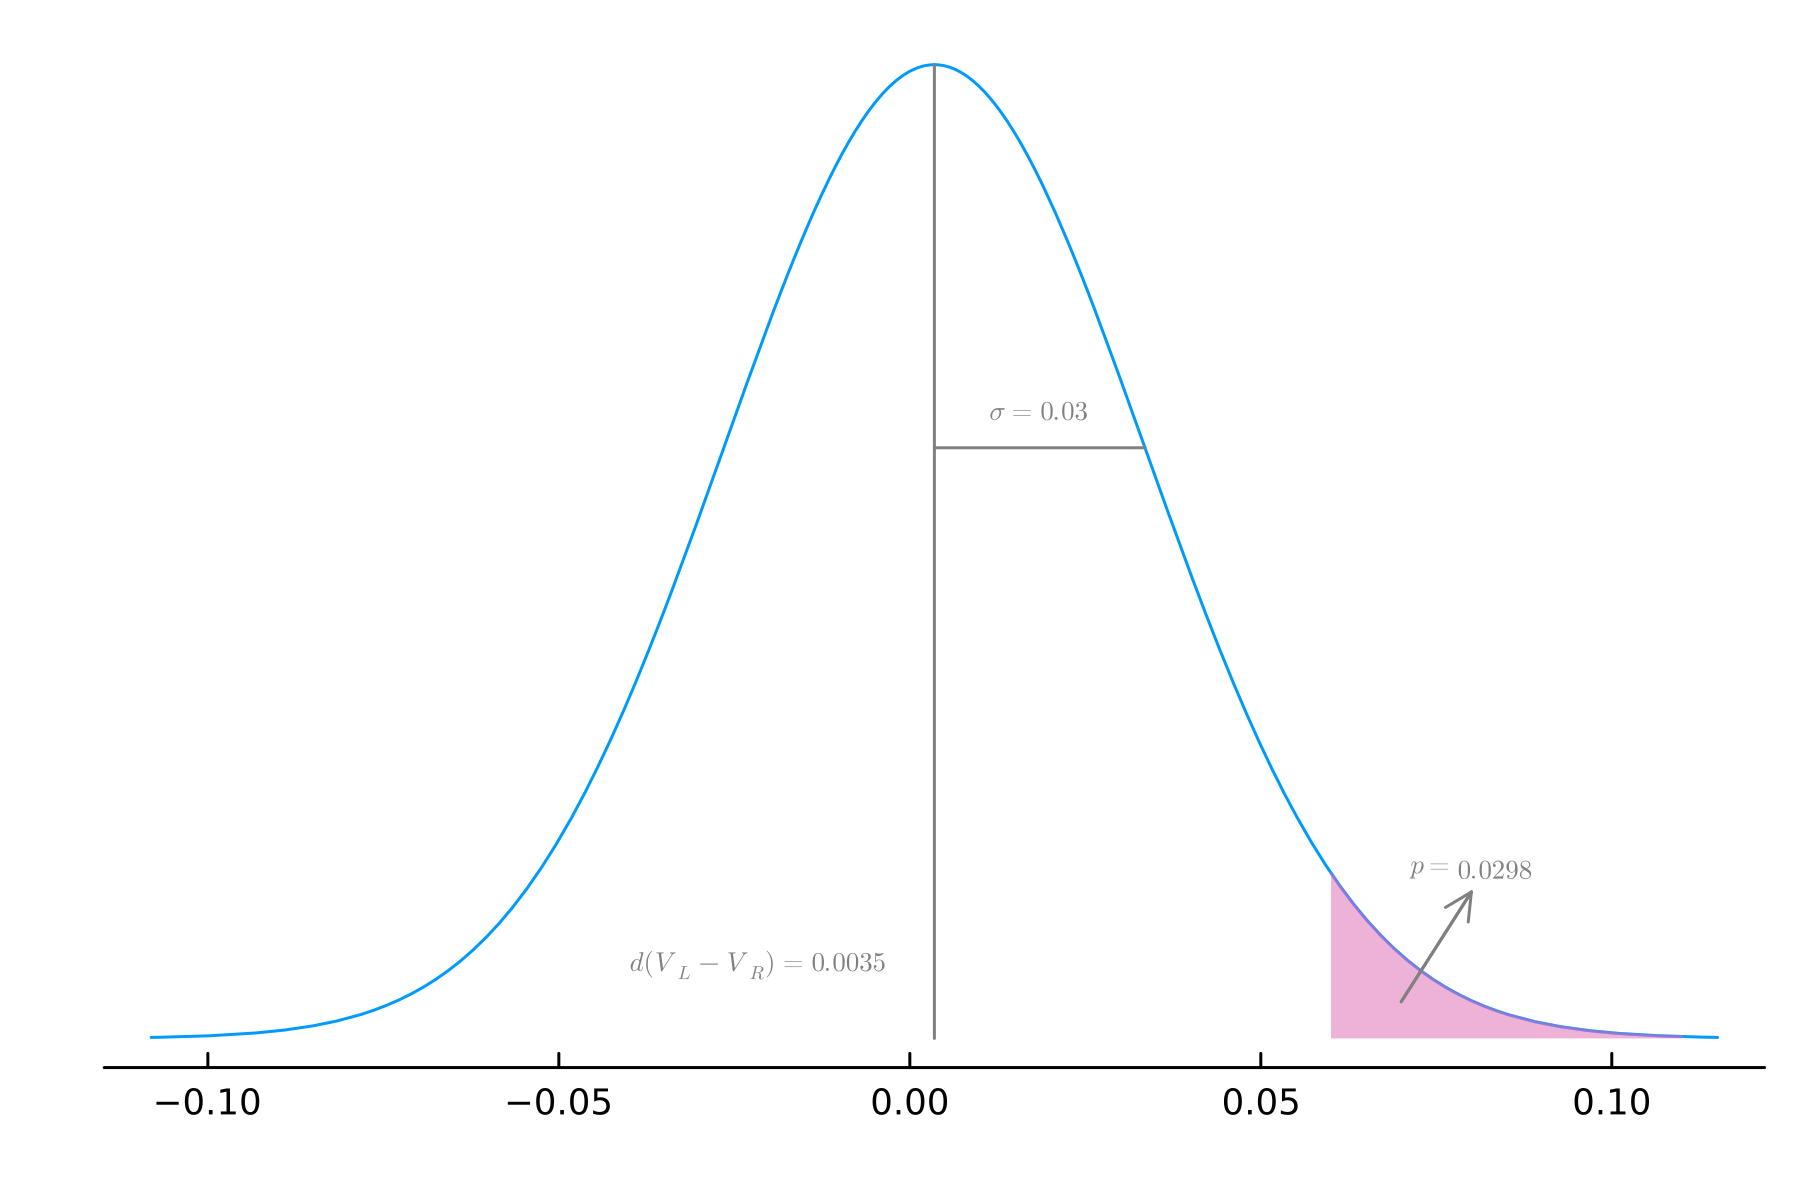

In [197]:
p1 = plot(legend = false, grid = false, bottom_margin = 5mm, dpi = 300)


# RDV sampling distribution
mu = m.d*(t.valueLeft - t.valueRight)
sd = m.σ
s1 = L"d(V_L - V_R) = 0.0035";
s2 = L"\sigma = 0.03"

plot!(Normal(mu,sd), legend = false, grid = false, showaxis = :x)

# Add drift rate info
plot!([mu, mu], [0, pdf(Normal(mu, sd), mu)], line = (:gray, 1))
annotate!(mu-sd+.005, 1, text(s1, color = :gray, 6))

# Add noise info
plot!([mu, mu+sd], [pdf(Normal(mu, sd), mu+sd), pdf(Normal(mu, sd), mu+sd)], line = (:gray, 1))
annotate!(mu+sd/2, pdf(Normal(mu, sd), mu+sd)+.5, text(s2, color = :gray, 6))


x = range(-.11, .11, length=1000)
y = pdf.(Normal(mu,sd), x)
ix = x .> .06
plot!(x[ix], y[ix], fillrange = zero(x[ix]), fc=RGB(223/255,101/255,176/255), opacity = .5)

plot!([.07, .08],[.5,2], arrow = true, color = :gray)
s3 = L"p = " * latexstring(round(1 - cdf(Normal(mu, sd), .06), sigdigits = 3)) 
annotate!(.08, 2.3, text(s3, color = :gray, 6))

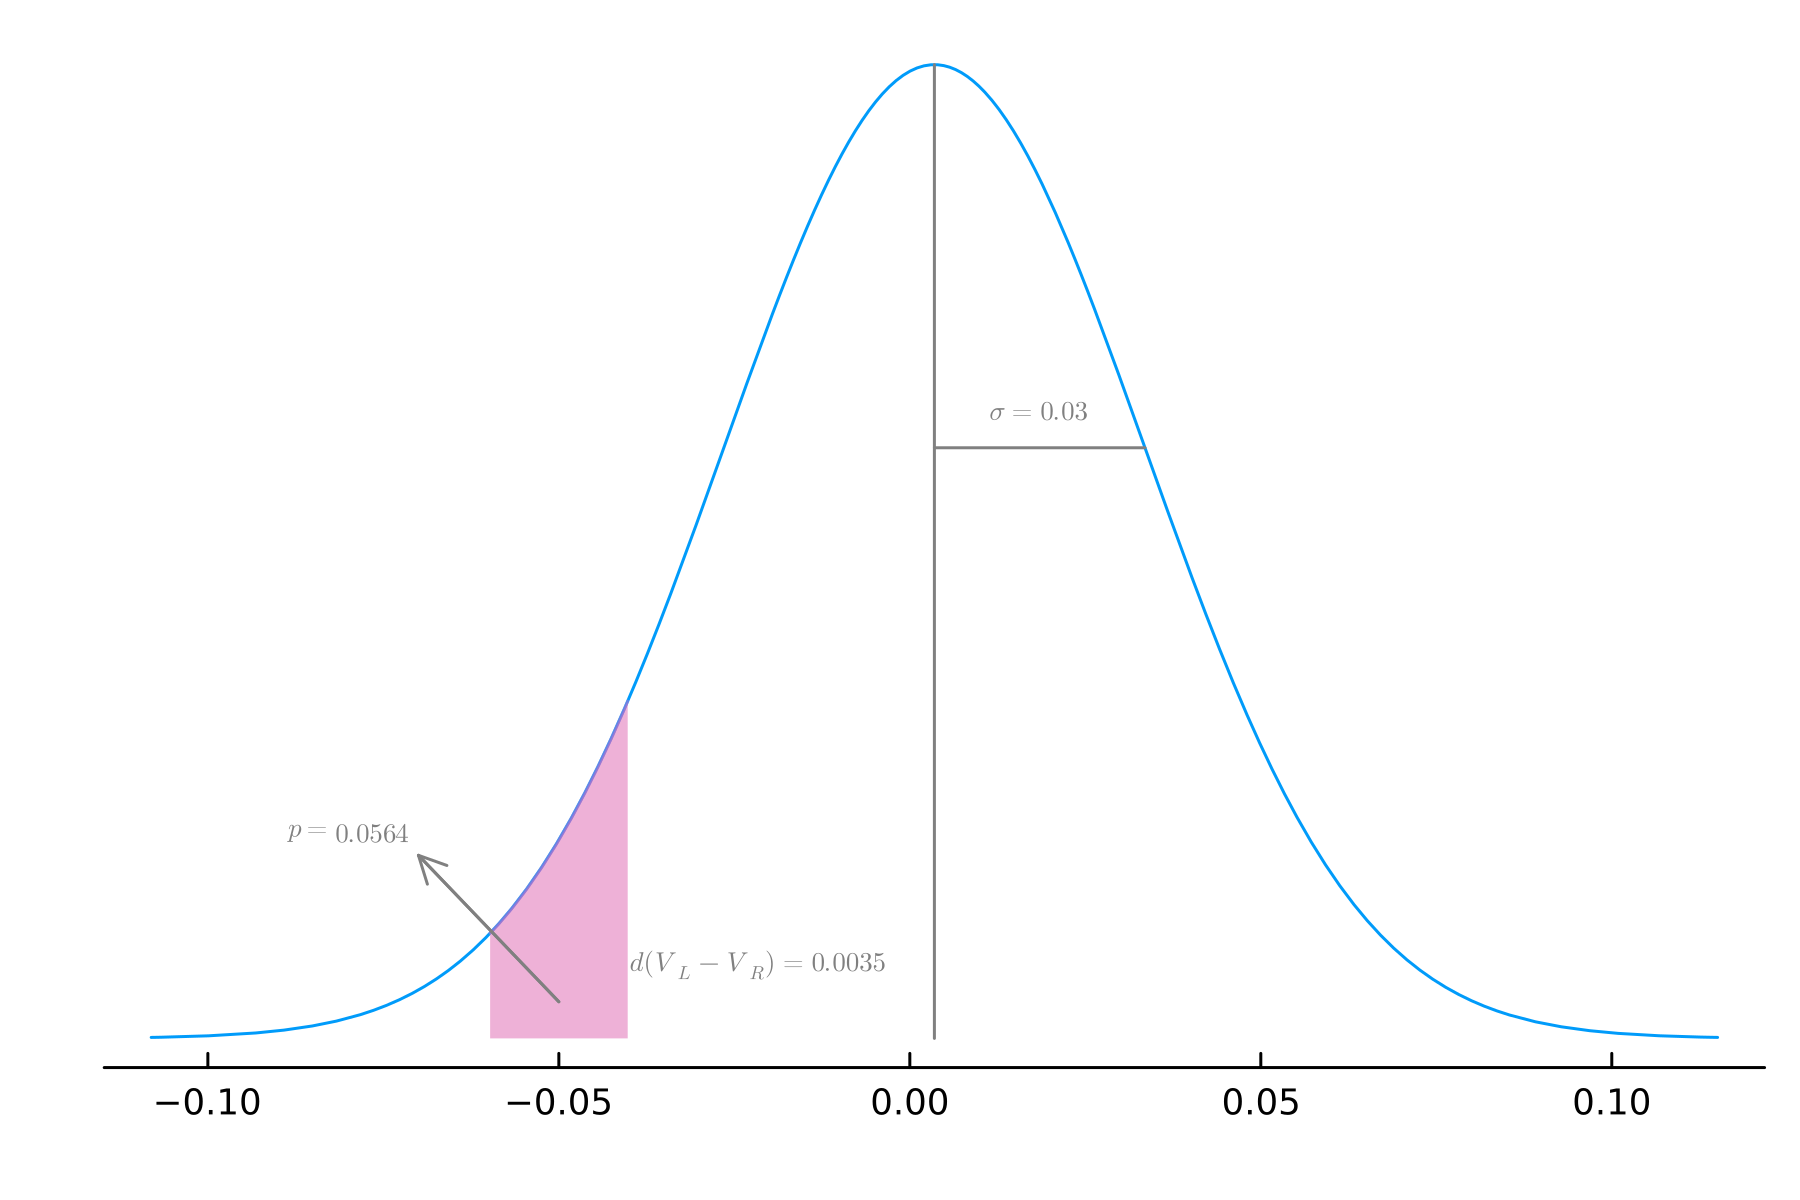

In [198]:
p2 = plot(legend = false, grid = false, bottom_margin = 5mm, dpi = 300)


# RDV sampling distribution
mu = m.d*(t.valueLeft - t.valueRight)
sd = m.σ
s1 = L"d(V_L - V_R) = 0.0035";
s2 = L"\sigma = 0.03"

plot!(Normal(mu,sd), legend = false, grid = false, showaxis = :x)

# Add drift rate info
plot!([mu, mu], [0, pdf(Normal(mu, sd), mu)], line = (:gray, 1))
annotate!(mu-sd+.005, 1, text(s1, color = :gray, 6))

# Add noise info
plot!([mu, mu+sd], [pdf(Normal(mu, sd), mu+sd), pdf(Normal(mu, sd), mu+sd)], line = (:gray, 1))
annotate!(mu+sd/2, pdf(Normal(mu, sd), mu+sd)+.5, text(s2, color = :gray, 6))


x = range(-.11, .11, length=1000)
y = pdf.(Normal(mu,sd), x)
ix = isless.(x, -.04) .& .!isless.(x, -.06)
plot!(x[ix], y[ix], fillrange = zero(x[ix]), fc=RGB(223/255,101/255,176/255), opacity = .5)

plot!([-.05, -.07],[.5,2.5], arrow = true, color = :gray)
# s3 = L"p(x > -.06 \cap x < -.04) = " * latexstring(round(cdf(Normal(mu, sd), -.04) - cdf(Normal(mu, sd), -.06), sigdigits = 3)) 
s3 = L"p = " * latexstring(round(cdf(Normal(mu, sd), -.04) - cdf(Normal(mu, sd), -.06), sigdigits = 3)) 
annotate!(-.08, 2.8, text(s3, color = :gray, 6))

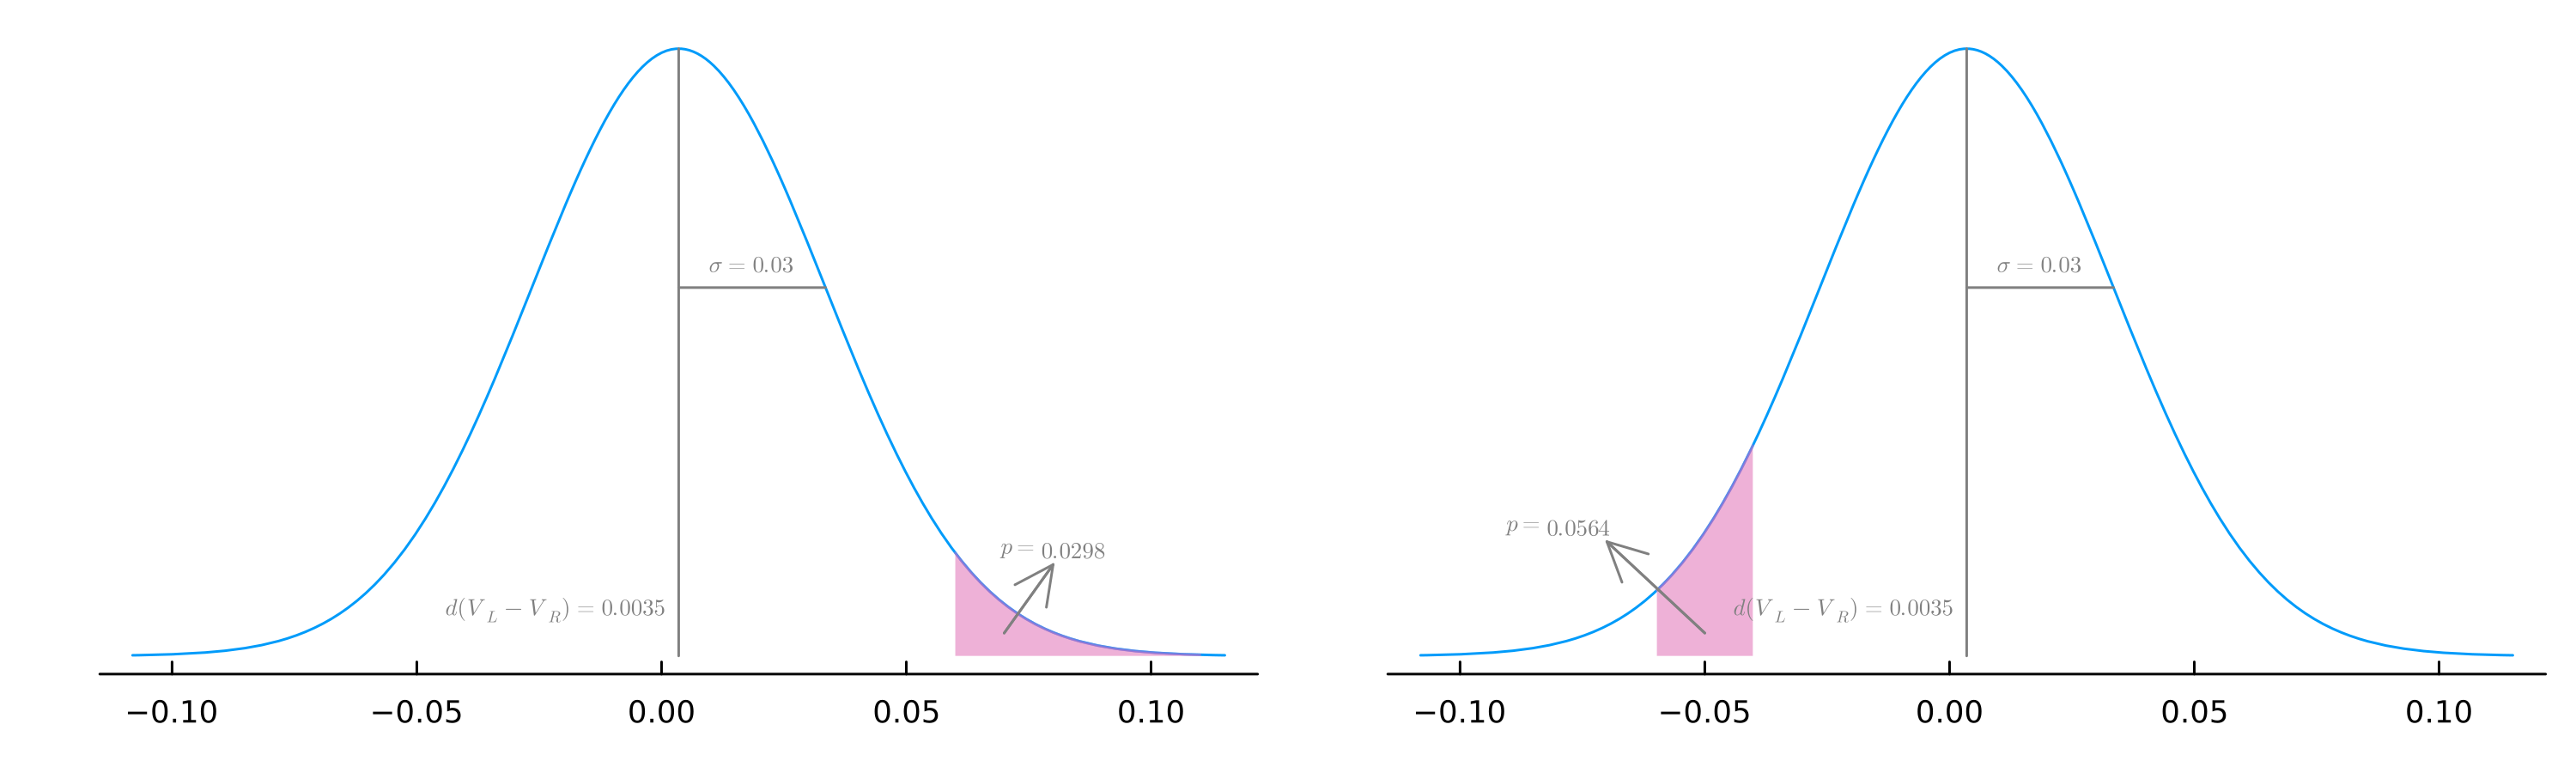

In [199]:
plot(p1, p2, size=(1000, 300), bottom_margin = 5mm, dpi = 300)

In [200]:
savefig("plot_2_6.png");

-0.06349775004725633

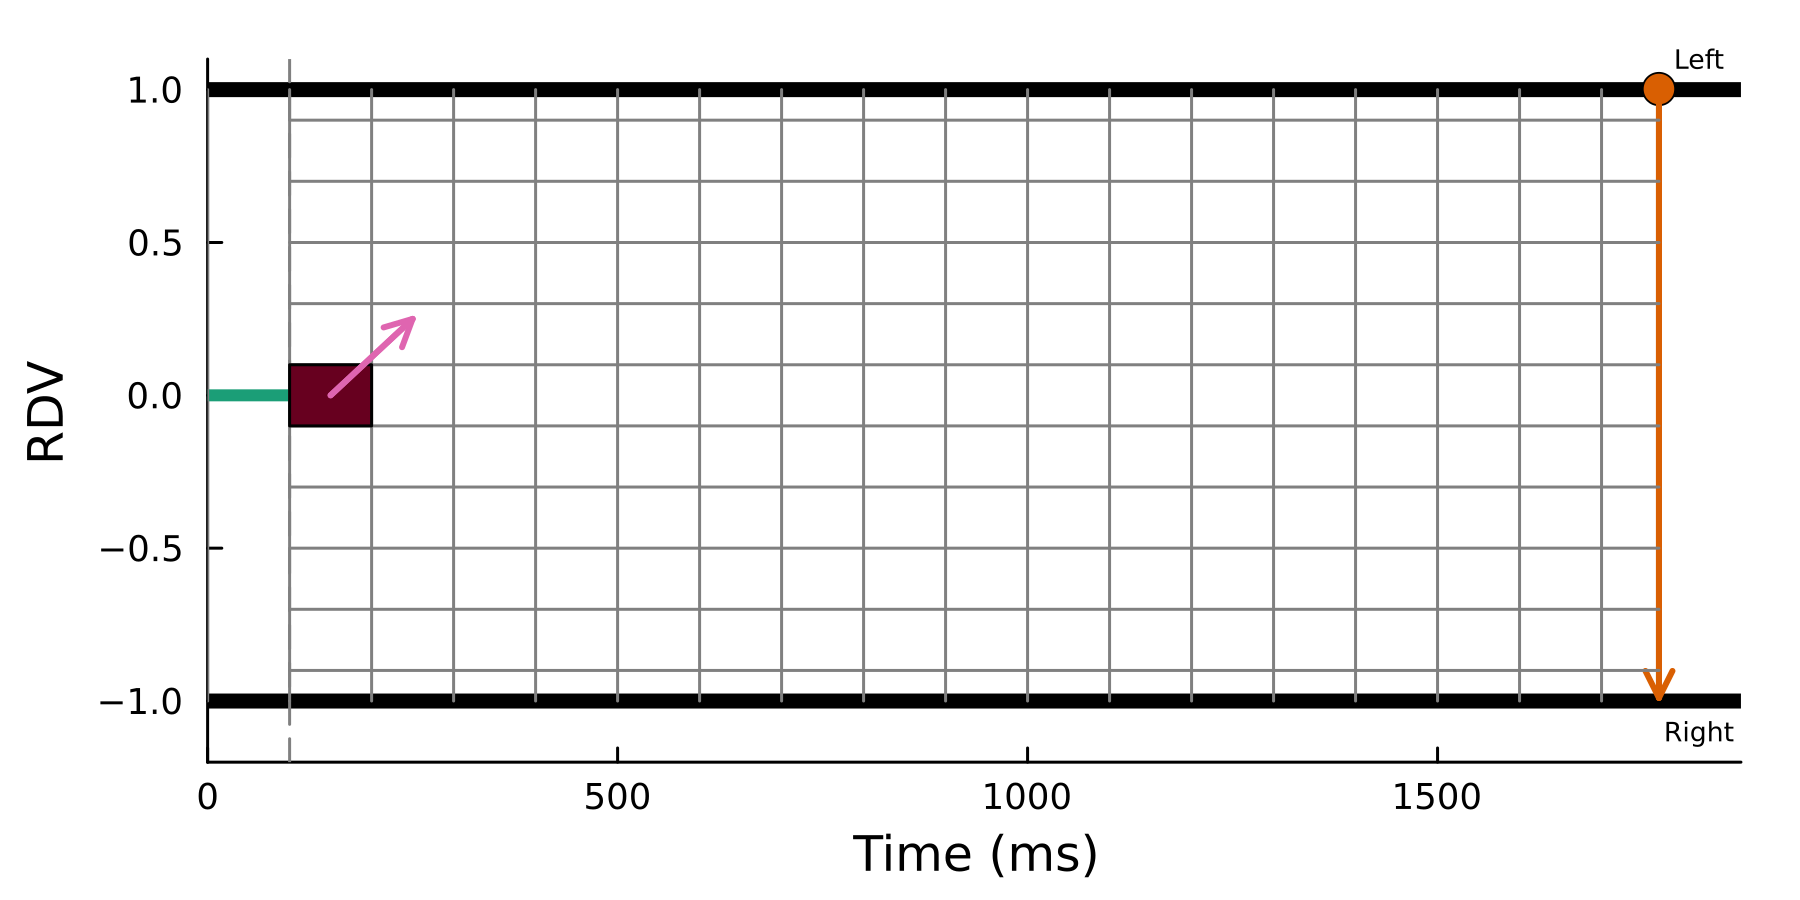

In [237]:
# Draw background
p1 = plot(legend = false, grid = false, ylims = [-1.2, 1.1], xlims = [0, t.RT+100], 
    xlabel = "Time (ms)", ylabel = "RDV", 
    dpi = 300, size = (600, 300), margin = 3mm)
hline!([-1, 1], line = (:black, 5))
# hline!([0], line = (:gray, 1))
vline!([m.nonDecisionTime], line = (:gray, 1), linestyle = :dash)

# Static plot
timeStep = 10
plot!([t.RT], [last(t.RDV)], marker = 6, color = RGB(217/255,95/255,2/255))

# Add annotations for ndt and RT
plot!([0, m.nonDecisionTime], [0, 0], line = (RGB(27/255,158/255,119/255) , 4))

plot!([t.RT, t.RT],[1,-.99], arrow = true, color = RGB(217/255,95/255,2/255), linewidth = 2)
# plot!([t.RT, t.RT], [-1, -.93], line = (RGB(217/255,95/255,2/255) , 4))
# annotate!(t.RT-80, -.87, text("RT = " * string(t.RT) * " ms", color = RGB(217/255,95/255,2/255), 6))


# for i in 1:length(states)
for i in -.9:.2:.9
  # plot!([m.nonDecisionTime, t.RT], [states[i], states[i]], line = (:gray, 1))
  plot!([m.nonDecisionTime, t.RT], [i, i], line = (:gray, 1))
end

for i in 0:100:t.RT
    plot!([i, i], [-1, 1], line = (:gray, 1))
end

annotate!(1820, 1.1, text("Left", 6))
annotate!(1820, -1.1, text("Right", 6))

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
plot!(rectangle(100,.2,100,-.1), color = RGB(103/255,0/255,31/255))

plot!([150,250],[0,.25], arrow = true, color = RGB(223/255,101/255,176/255), linewidth = 2)


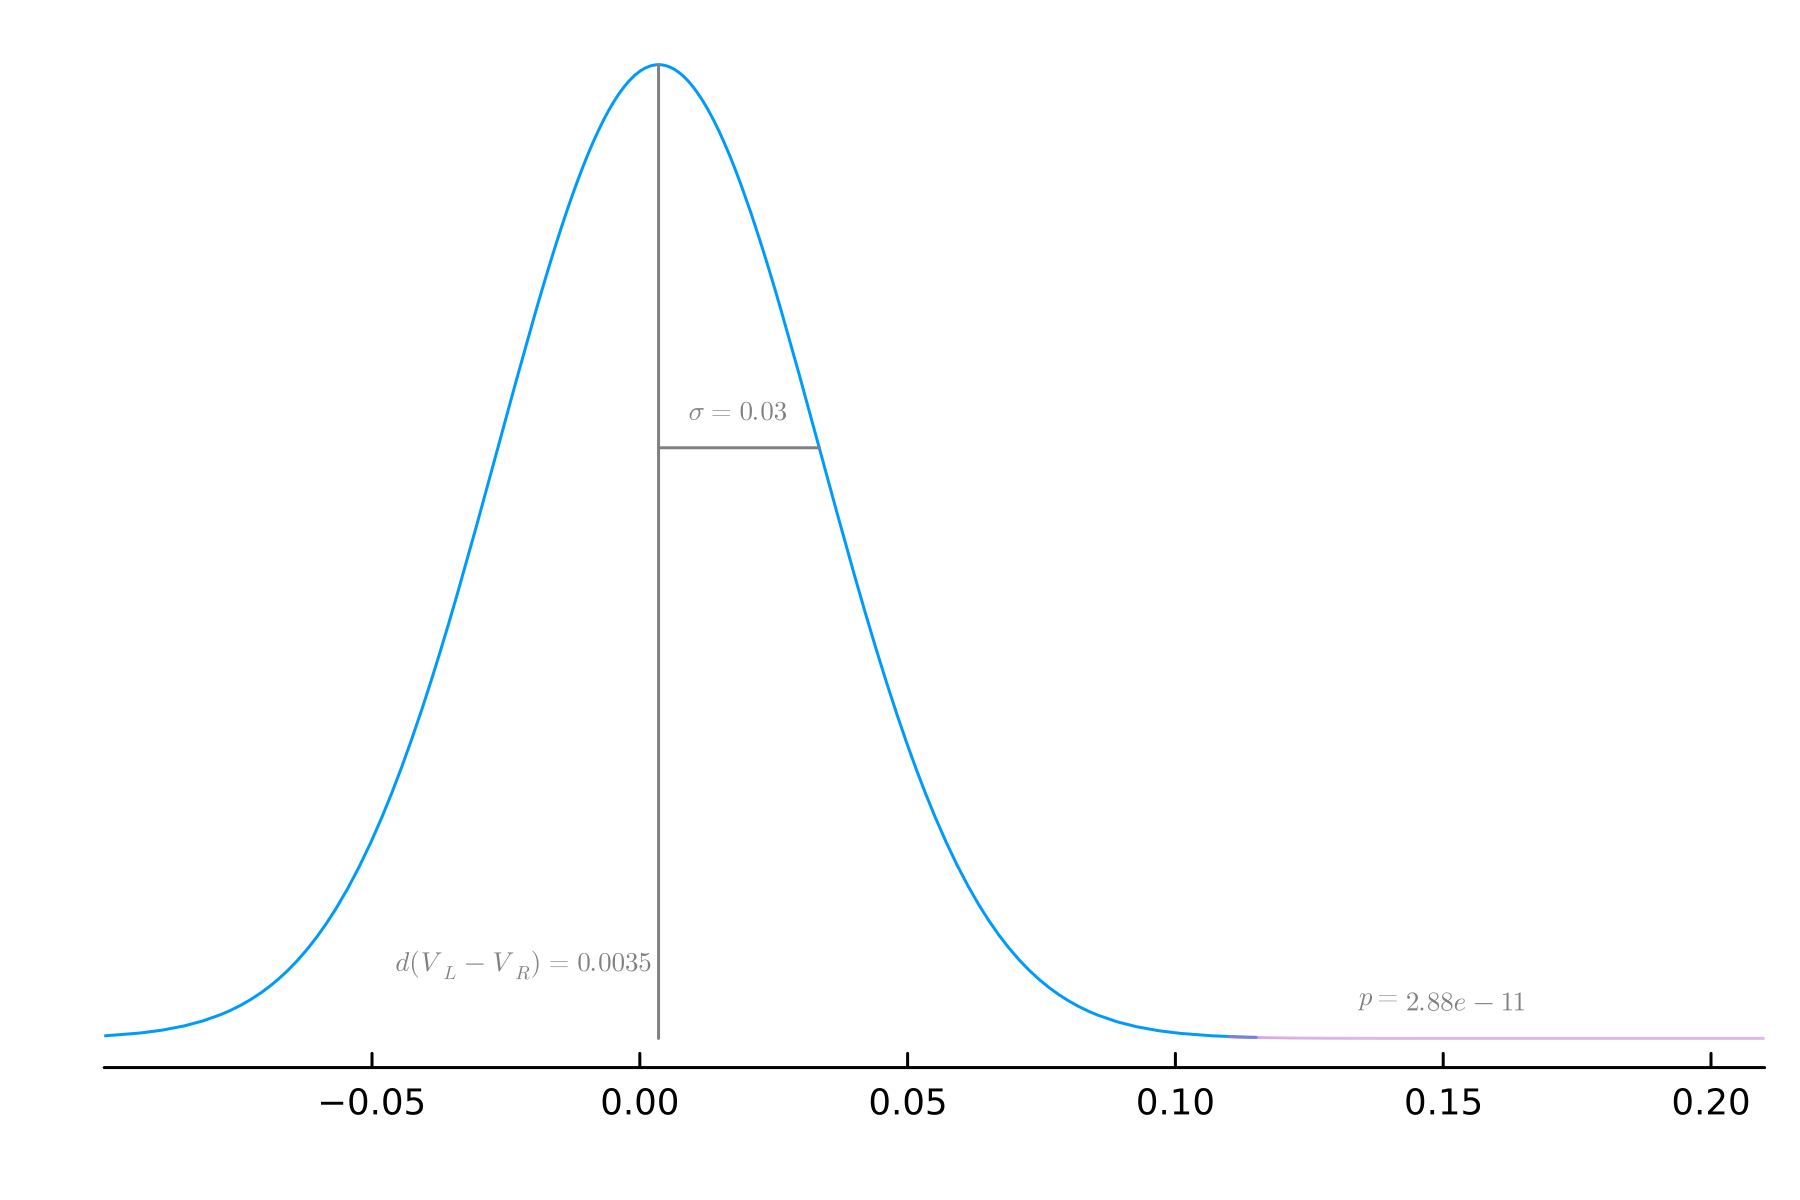

In [238]:
p2 = plot(legend = false, grid = false, bottom_margin = 5mm, dpi = 300)


# RDV sampling distribution
mu = m.d*(t.valueLeft - t.valueRight)
sd = m.σ
s1 = L"d(V_L - V_R) = 0.0035";
s2 = L"\sigma = 0.03"

plot!(Normal(mu,sd), legend = false, grid = false, showaxis = :x,
xlims = [-0.1, .21])

# Add drift rate info
plot!([mu, mu], [0, pdf(Normal(mu, sd), mu)], line = (:gray, 1))
annotate!(mu-sd+.005, 1, text(s1, color = :gray, 6))

# Add noise info
plot!([mu, mu+sd], [pdf(Normal(mu, sd), mu+sd), pdf(Normal(mu, sd), mu+sd)], line = (:gray, 1))
annotate!(mu+sd/2, pdf(Normal(mu, sd), mu+sd)+.5, text(s2, color = :gray, 6))


x = range(-.11, .21, length=3000)
y = pdf.(Normal(mu,sd), x)
ix = x .> .11
plot!(x[ix], y[ix], fillrange = zero(x[ix]), 
      fc=RGB(223/255,101/255,176/255), opacity = .5,
      xlims = [-0.1, .21])

# plot!([.07, .08],[.5,2], arrow = true, color = :gray)
s3 = L"p = " * latexstring(round(cdf(Normal(mu, sd), .4) - cdf(Normal(mu, sd), .2), sigdigits = 3)) 
annotate!(.15, .5, text(s3, color = :gray, 6))

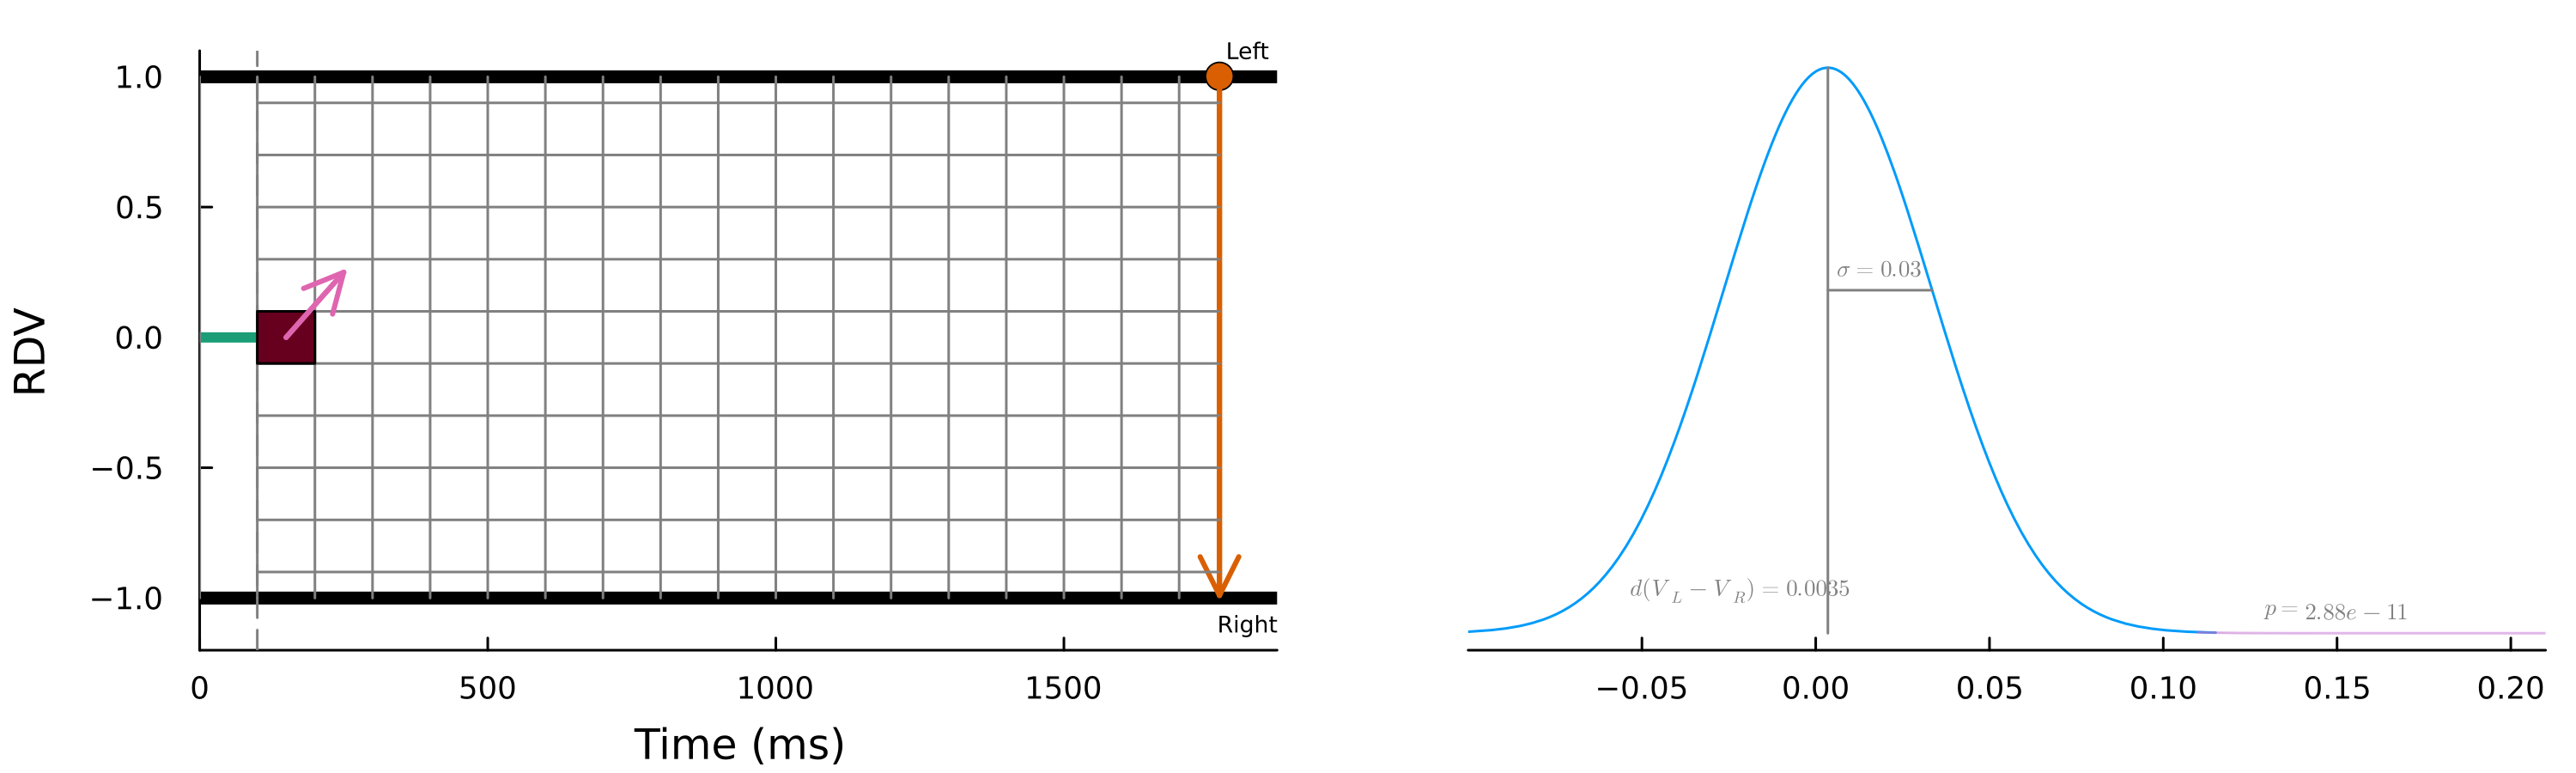

In [241]:
plot(p1, p2, size=(1000, 300), bottom_margin = 5mm, left_margin = 5mm, dpi = 300)

In [242]:
savefig("plot_2_7.png");